In [6]:
#a1
import numpy as np
import pandas as pd

# 1. Summation Unit
def summation_unit(inputs, weights, bias):
    """
    Calculates the weighted sum of inputs with bias.
    """
    return np.dot(inputs, weights) + bias

# 2. Activation Functions
def step_function(x):
    """Step function: outputs 1 if x >= 0, otherwise 0"""
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    """Bipolar step function: outputs 1 if x >= 0, otherwise -1"""
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def tanh_function(x):
    """TanH activation function"""
    return np.tanh(x)

def relu_function(x):
    """ReLU (Rectified Linear Unit) activation function"""
    return max(0, x)

def leaky_relu_function(x, alpha=0.01):
    """Leaky ReLU activation function"""
    return x if x >= 0 else alpha * x

# 3. Comparator Unit for Error Calculation
def comparator_unit(predicted, actual):
    """
    Compares the predicted output with the actual label and returns the error.
    
    The error is calculated as the difference between the actual value and the predicted value.
    """
    error = actual - predicted
    return error

# 4. Perceptron Model
def perceptron_model(inputs, weights, bias, activation_function):
    """
    Forward propagation: calculates the weighted sum and applies the activation function.
    """
    weighted_sum = summation_unit(inputs, weights, bias)
    return activation_function(weighted_sum)

# 5. Training Perceptron
def train_perceptron(X, y, learning_rate=0.1, epochs=10, activation_function=step_function):
    """
    Trains the perceptron using the provided inputs X and labels y.
    """
    weights = np.zeros(X.shape[1])  # Initialize weights to 0
    bias = 0  # Initialize bias to 0
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Predict using the perceptron model
            prediction = perceptron_model(X[i], weights, bias, activation_function)
            error = comparator_unit(prediction, y[i])  # Use comparator unit to calculate error

            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

        print(f"Epoch {epoch+1}/{epochs}, Weights: {weights}, Bias: {bias}")
    return weights, bias

# Load Dataset
df = pd.read_csv('CTG.csv')

# Assume we are using 'ASTV' and 'MSTV' as features and 'CLASS' as the label
X = df[['ASTV', 'MSTV']].values  # Input features
y = df['CLASS'].values  # Output labels (assuming binary classification for 'CLASS')

# Convert 'CLASS' to binary labels if necessary
# For example: 0 or 1 classification
y = np.where(y > 1, 1, 0)  # Assuming the threshold is '1'

# Train the perceptron using different activation functions
print("Training with Step Activation Function")
weights_step, bias_step = train_perceptron(X, y, learning_rate=0.01, epochs=10, activation_function=step_function)

print("\nTraining with Sigmoid Activation Function")
weights_sigmoid, bias_sigmoid = train_perceptron(X, y, learning_rate=0.01, epochs=10, activation_function=sigmoid_function)

print("\nTraining with Tanh Activation Function")
weights_tanh, bias_tanh = train_perceptron(X, y, learning_rate=0.01, epochs=10, activation_function=tanh_function)

print("\nTraining with ReLU Activation Function")
weights_relu, bias_relu = train_perceptron(X, y, learning_rate=0.01, epochs=10, activation_function=relu_function)

print("\nTraining with Leaky ReLU Activation Function")
weights_leaky_relu, bias_leaky_relu = train_perceptron(X, y, learning_rate=0.01, epochs=10, activation_function=leaky_relu_function)

# Testing the perceptron on the dataset
def test_perceptron(X, y, weights, bias, activation_function):
    """
    Tests the perceptron model on the provided inputs and compares predictions with actual labels.
    """
    print("\nTesting Perceptron on the dataset:")
    for i in range(X.shape[0]):
        prediction = perceptron_model(X[i], weights, bias, activation_function)
        print(f"Input: {X[i]}, Predicted: {prediction}, Actual: {y[i]}")

# Example: Test using step function
test_perceptron(X, y, weights_step, bias_step, step_function)


Training with Step Activation Function
Epoch 1/10, Weights: [nan nan], Bias: 0.08
Epoch 2/10, Weights: [nan nan], Bias: 17.499999999999936
Epoch 3/10, Weights: [nan nan], Bias: 34.92000000000162
Epoch 4/10, Weights: [nan nan], Bias: 52.339999999998156
Epoch 5/10, Weights: [nan nan], Bias: 69.75999999999878
Epoch 6/10, Weights: [nan nan], Bias: 87.1800000000077
Epoch 7/10, Weights: [nan nan], Bias: 104.6000000000166
Epoch 8/10, Weights: [nan nan], Bias: 122.02000000002552
Epoch 9/10, Weights: [nan nan], Bias: 139.44000000001816
Epoch 10/10, Weights: [nan nan], Bias: 156.86000000000232

Training with Sigmoid Activation Function
Epoch 1/10, Weights: [nan nan], Bias: nan
Epoch 2/10, Weights: [nan nan], Bias: nan
Epoch 3/10, Weights: [nan nan], Bias: nan
Epoch 4/10, Weights: [nan nan], Bias: nan
Epoch 5/10, Weights: [nan nan], Bias: nan
Epoch 6/10, Weights: [nan nan], Bias: nan
Epoch 7/10, Weights: [nan nan], Bias: nan
Epoch 8/10, Weights: [nan nan], Bias: nan
Epoch 9/10, Weights: [nan nan]

Training completed in 130 epochs with final weights: [0.1  0.05], bias: -0.10000000000000765


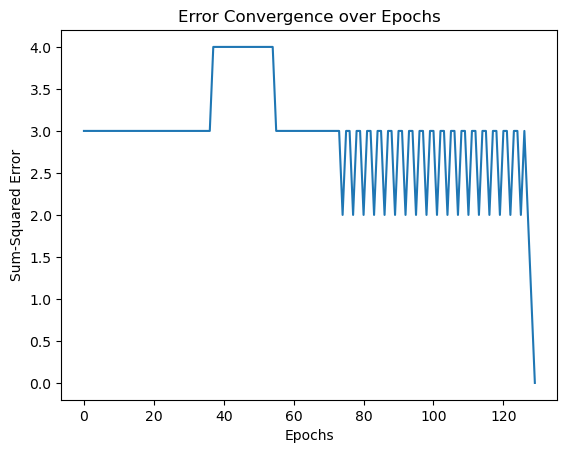


Testing AND gate Perceptron:
Input: [0 0] -> Predicted Output: 0, Actual Output: 0
Input: [0 1] -> Predicted Output: 0, Actual Output: 0
Input: [1 0] -> Predicted Output: 0, Actual Output: 0
Input: [1 1] -> Predicted Output: 1, Actual Output: 1


In [7]:
#a2
import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function
def step_function(x):
    """Step function: returns 1 if x >= 0, else 0."""
    return 1 if x >= 0 else 0

# Perceptron Model
def perceptron_model(inputs, weights, bias):
    """Performs the weighted sum and applies the step function."""
    weighted_sum = np.dot(inputs, weights) + bias
    return step_function(weighted_sum)

# Training the Perceptron
def train_perceptron(X, y, weights, bias, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    epoch = 0
    errors = []
    for epoch in range(max_epochs):
        sum_squared_error = 0
        for i in range(len(X)):
            # Predict the output
            prediction = perceptron_model(X[i], weights, bias)
            error = y[i] - prediction
            
            # Update the weights and bias based on the error
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            
            # Accumulate squared error
            sum_squared_error += error**2
        
        errors.append(sum_squared_error)
        
        # Stop if the sum-squared error is below the threshold
        if sum_squared_error <= error_threshold:
            break
            
    print(f"Training completed in {epoch+1} epochs with final weights: {weights}, bias: {bias}")
    return weights, bias, errors

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND Gate Outputs

# Initial weights and bias
weights = np.array([0.2, -0.75])  # W1 = 0.2, W2 = -0.75
bias = 10  # W0 = 10

# Train the perceptron
weights, bias, errors = train_perceptron(X, y, weights, bias, learning_rate=0.05)

# Plotting the errors over epochs
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence over Epochs')
plt.show()

# Test the perceptron with final weights
print("\nTesting AND gate Perceptron:")
for i in range(len(X)):
    output = perceptron_model(X[i], weights, bias)
    print(f"Input: {X[i]} -> Predicted Output: {output}, Actual Output: {y[i]}")


In [9]:
#a3
import numpy as np
import pandas as pd

# 1. Summation Unit
def summation_unit(inputs, weights, bias):
    """Calculates the weighted sum of inputs with bias."""
    return np.dot(inputs, weights) + bias

# 2. Activation Functions
def step_function(x):
    """Step function: outputs 1 if x >= 0, otherwise 0"""
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    """Bi-Polar step function: outputs 1 if x > 0, 0 if x == 0, and -1 if x < 0"""
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

def sigmoid_function(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    """ReLU activation function"""
    return max(0, x)

# 3. Comparator Unit for Error Calculation
def comparator_unit(predicted, actual):
    """Compares the predicted output with the actual label and returns the error."""
    error = actual - predicted
    return error

# 4. Perceptron Model
def perceptron_model(inputs, weights, bias, activation_function):
    """Forward propagation: calculates the weighted sum and applies the activation function."""
    weighted_sum = summation_unit(inputs, weights, bias)
    return activation_function(weighted_sum)

# 5. Training Perceptron
def train_perceptron(X, y, learning_rate=0.01, epochs=1000, activation_function=step_function, error_threshold=0.002):
    """Trains the perceptron using the provided inputs X and labels y."""
    weights = np.zeros(X.shape[1])  # Initialize weights to 0
    bias = 0  # Initialize bias to 0
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            # Predict using the perceptron model
            prediction = perceptron_model(X[i], weights, bias, activation_function)
            error = comparator_unit(prediction, y[i])  # Use comparator unit to calculate error
            
            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            
            total_error += error ** 2  # Accumulate squared error

        # Stop if error is below threshold
        if total_error < error_threshold:
            print(f"Converged after {epoch+1} epochs")
            break
    return weights, bias, epoch+1

# Load Dataset
df = pd.read_csv('CTG.csv')

# Assume we are using 'ASTV' and 'MSTV' as features and 'CLASS' as the label
X = df[['ASTV', 'MSTV']].values  # Input features
y = df['CLASS'].values  # Output labels (assuming binary classification for 'CLASS')

# Convert 'CLASS' to binary labels if necessary (0 or 1 classification)
y = np.where(y > 1, 1, 0)  # Assuming threshold is '1'

# Train the perceptron with different activation functions
print("\nTraining with Bi-Polar Step Activation Function")
weights_bipolar_step, bias_bipolar_step, epochs_bipolar = train_perceptron(X, y, learning_rate=0.01, activation_function=bipolar_step_function)

print("\nTraining with Sigmoid Activation Function")
weights_sigmoid, bias_sigmoid, epochs_sigmoid = train_perceptron(X, y, learning_rate=0.01, activation_function=sigmoid_function)

print("\nTraining with ReLU Activation Function")
weights_relu, bias_relu, epochs_relu = train_perceptron(X, y, learning_rate=0.01, activation_function=relu_function)

# Compare the number of iterations (epochs) taken for each activation function
print("\nComparison of Epochs to Converge:")
print(f"Bi-Polar Step Function: {epochs_bipolar} epochs")
print(f"Sigmoid Function: {epochs_sigmoid} epochs")
print(f"ReLU Function: {epochs_relu} epochs")



Training with Bi-Polar Step Activation Function

Training with Sigmoid Activation Function

Training with ReLU Activation Function

Comparison of Epochs to Converge:
Bi-Polar Step Function: 1000 epochs
Sigmoid Function: 1000 epochs
ReLU Function: 1000 epochs



Training with learning rate: 0.1

Training with learning rate: 0.2

Training with learning rate: 0.3

Training with learning rate: 0.4

Training with learning rate: 0.5

Training with learning rate: 0.6

Training with learning rate: 0.7

Training with learning rate: 0.8

Training with learning rate: 0.9

Training with learning rate: 1.0


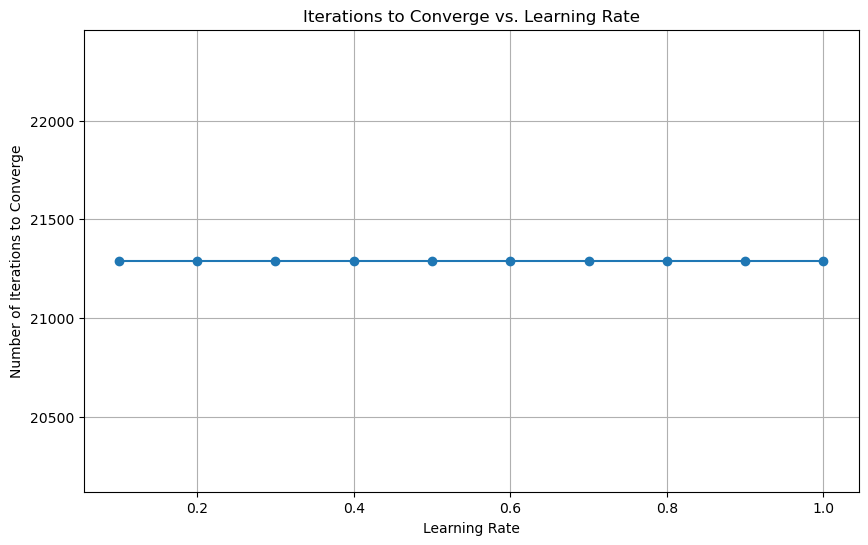

In [10]:
#a4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Summation Unit
def summation_unit(inputs, weights, bias):
    """Calculates the weighted sum of inputs with bias."""
    return np.dot(inputs, weights) + bias

# 2. Activation Functions
def step_function(x):
    """Step function: outputs 1 if x >= 0, otherwise 0"""
    return 1 if x >= 0 else 0

# 3. Comparator Unit for Error Calculation
def comparator_unit(predicted, actual):
    """Compares the predicted output with the actual label and returns the error."""
    error = actual - predicted
    return error

# 4. Perceptron Model
def perceptron_model(inputs, weights, bias, activation_function):
    """Forward propagation: calculates the weighted sum and applies the activation function."""
    weighted_sum = summation_unit(inputs, weights, bias)
    return activation_function(weighted_sum)

# 5. Training Perceptron
def train_perceptron(X, y, learning_rate=0.1, epochs=10, activation_function=step_function):
    """Trains the perceptron using the provided inputs X and labels y."""
    weights = np.zeros(X.shape[1])  # Initialize weights to 0
    bias = 0  # Initialize bias to 0
    iterations = 0  # Count the number of iterations for convergence

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            iterations += 1
            # Predict using the perceptron model
            prediction = perceptron_model(X[i], weights, bias, activation_function)
            error = comparator_unit(prediction, y[i])  # Use comparator unit to calculate error

            # Update weights and bias if there is an error
            if error != 0:
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

    return weights, bias, iterations

# 6. Varying Learning Rate
def vary_learning_rate(X, y, learning_rates, epochs=10, activation_function=step_function):
    """Trains the perceptron for each learning rate and records the number of iterations for convergence."""
    iterations_per_lr = []

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        _, _, iterations = train_perceptron(X, y, learning_rate=lr, epochs=epochs, activation_function=activation_function)
        iterations_per_lr.append(iterations)

    return iterations_per_lr

# Load Dataset
df = pd.read_csv('CTG.csv')

# Assume we are using 'ASTV' and 'MSTV' as features and 'CLASS' as the label
X = df[['ASTV', 'MSTV']].values  # Input features
y = df['CLASS'].values  # Output labels (assuming binary classification for 'CLASS')

# Convert 'CLASS' to binary labels if necessary
y = np.where(y > 1, 1, 0)  # Assuming the threshold is '1'

# Define the learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Train the perceptron with varying learning rates and record the number of iterations for convergence
iterations_per_lr = vary_learning_rate(X, y, learning_rates, epochs=10, activation_function=step_function)

# Plot the number of iterations against the learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, iterations_per_lr, marker='o')
plt.title('Iterations to Converge vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.grid(True)
plt.show()


Learning Rate: 0.1, Iterations: 226
Learning Rate: 0.2, Iterations: 137
Learning Rate: 0.3, Iterations: 101
Learning Rate: 0.4, Iterations: 80
Learning Rate: 0.5, Iterations: 68
Learning Rate: 0.6, Iterations: 58
Learning Rate: 0.7, Iterations: 52
Learning Rate: 0.8, Iterations: 46
Learning Rate: 0.9, Iterations: 42
Learning Rate: 1.0, Iterations: 39


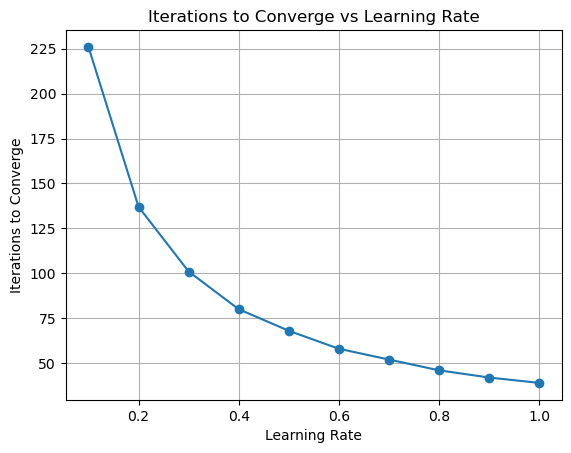

In [11]:
#a5
import numpy as np
import matplotlib.pyplot as plt

# Assume this function computes the gradient and updates weights using gradient descent.
# Modify this function according to your specific model in Exercise A1.
def gradient_descent(X, y, weights, learning_rate, tolerance=1e-6, max_iters=10000):
    m = len(y)  # number of training examples
    cost_history = []
    iteration_count = 0
    
    for i in range(max_iters):
        # Compute the predictions (e.g., for linear regression y_pred = X.dot(weights))
        y_pred = np.dot(X, weights)
        
        # Compute the error (difference between actual and predicted values)
        error = y_pred - y
        
        # Calculate the gradient
        gradient = np.dot(X.T, error) / m
        
        # Update the weights
        weights = weights - learning_rate * gradient
        
        # Compute the cost (e.g., Mean Squared Error)
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)
        
        iteration_count += 1
        
        # Check if the change in cost is less than the tolerance for convergence
        if len(cost_history) > 1 and np.abs(cost_history[-2] - cost_history[-1]) < tolerance:
            break
    
    return iteration_count

# Sample data (replace with your data from Exercise A1)
X = np.random.rand(100, 2)  # 100 examples, 2 features (dummy data)
y = np.random.rand(100)     # 100 labels (dummy data)
initial_weights = np.random.rand(2)  # Initial weights

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
iterations = []

# Run gradient descent for each learning rate and collect the number of iterations
for lr in learning_rates:
    weights = np.copy(initial_weights)  # Keep the same initial weights
    iter_count = gradient_descent(X, y, weights, lr)
    iterations.append(iter_count)
    print(f"Learning Rate: {lr}, Iterations: {iter_count}")

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations, marker='o')
plt.title('Iterations to Converge vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.grid(True)
plt.show()


In [14]:
#A6
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the customer data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment (Rs)': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Map 'Yes' and 'No' to binary values
df['High Value Tx?'] = df['High Value Tx?'].map({'Yes': 1, 'No': 0})

# Features (Candies, Mangoes, Milk Packets, Payment)
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment (Rs)']]

# Target (High Value Transaction)
y = df['High Value Tx?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling them)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLPClassifier with sigmoid activation function
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='adam', max_iter=2000, tol=1e-5, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
# Use zero_division=0 to handle undefined precision warning
print(classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
[[2 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\S.n.umamahesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
#A7
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the customer data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment (Rs)': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Map 'Yes' and 'No' to binary values
df['High Value Tx?'] = df['High Value Tx?'].map({'Yes': 1, 'No': 0})

# Features (Candies, Mangoes, Milk Packets, Payment)
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment (Rs)']].values

# Target (High Value Transaction)
y = df['High Value Tx?'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling them)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================
# Perceptron Learning (MLPClassifier)
# ========================
# Initialize the MLPClassifier with sigmoid activation function
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='adam', max_iter=2000, tol=1e-5, random_state=42)

# Train the classifier
mlp.fit(X_train_scaled, y_train)

# Make predictions with the perceptron
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the perceptron model
print("Perceptron (MLPClassifier) Results:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, zero_division=0))

# ========================
# Matrix Pseudo-inverse Method
# ========================
# Add a bias term (column of ones) to the training set
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train_scaled])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test_scaled])

# Compute the pseudo-inverse of the training set
X_pseudo_inverse = np.linalg.pinv(X_train_bias)

# Compute the weights using the pseudo-inverse
weights = np.dot(X_pseudo_inverse, y_train)

# Make predictions on the test set
y_pred_pinv = np.dot(X_test_bias, weights)
y_pred_pinv = (y_pred_pinv >= 0.5).astype(int)  # Convert to binary classification

# Evaluate the pseudo-inverse method
print("\nMatrix Pseudo-inverse Results:")
print(confusion_matrix(y_test, y_pred_pinv))
print(classification_report(y_test, y_pred_pinv, zero_division=0))

Perceptron (MLPClassifier) Results:
[[2 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Matrix Pseudo-inverse Results:
[[2 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\S.n.umamahesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
#A8
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for the AND gate (A, B) and the target output (AND gate logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs for AND gate
y = np.array([[0], [0], [0], [1]])  # Expected outputs for AND gate

# Initialize the weights and biases for the network
np.random.seed(42)
v11 = np.random.rand()  # Weight from A to H1
v12 = np.random.rand()  # Weight from A to H2
v21 = np.random.rand()  # Weight from B to H1
v22 = np.random.rand()  # Weight from B to H2
w1 = np.random.rand()   # Weight from H1 to O1
w2 = np.random.rand()   # Weight from H2 to O1

# Learning rate
alpha = 0.05

# Error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000

# Training the network using backpropagation
for iteration in range(max_iterations):
    total_error = 0  # Accumulate the error over all training samples

    for i in range(len(X)):
        # Forward pass
        A = X[i][0]  # Input A
        B = X[i][1]  # Input B

        # Hidden layer (H1, H2)
        H1_input = A * v11 + B * v21
        H2_input = A * v12 + B * v22
        H1_output = sigmoid(H1_input)
        H2_output = sigmoid(H2_input)

        # Output layer (O1)
        O1_input = H1_output * w1 + H2_output * w2
        O1_output = sigmoid(O1_input)

        # Calculate the error (target - output)
        error = y[i] - O1_output
        total_error += error**2

        # Backpropagation to update the weights
        # Calculate deltas for output and hidden layers
        delta_O1 = error * sigmoid_derivative(O1_output)

        delta_H1 = delta_O1 * w1 * sigmoid_derivative(H1_output)
        delta_H2 = delta_O1 * w2 * sigmoid_derivative(H2_output)

        # Update weights (gradient descent)
        w1 += alpha * delta_O1 * H1_output
        w2 += alpha * delta_O1 * H2_output

        v11 += alpha * delta_H1 * A
        v12 += alpha * delta_H2 * A
        v21 += alpha * delta_H1 * B
        v22 += alpha * delta_H2 * B

    # Calculate mean squared error for convergence
    mse = total_error / len(X)

    # Stop training if the error is below the threshold
    if mse <= error_threshold:
        print(f"Converged after {iteration + 1} iterations with MSE: {mse}")
        break
else:
    print(f"Stopped after {max_iterations} iterations with MSE: {mse}")

# Final weights after training
print(f"Final weights: v11 = {v11}, v12 = {v12}, v21 = {v21}, v22 = {v22}, w1 = {w1}, w2 = {w2}")

# Test the final network on all inputs
for i in range(len(X)):
    A = X[i][0]
    B = X[i][1]

    # Forward pass
    H1_input = A * v11 + B * v21
    H2_input = A * v12 + B * v22
    H1_output = sigmoid(H1_input)
    H2_output = sigmoid(H2_input)

    O1_input = H1_output * w1 + H2_output * w2
    O1_output = sigmoid(O1_input)

    print(f"Input: {A}, {B}, Predicted Output: {O1_output}, Expected Output: {y[i][0]}")

Stopped after 1000 iterations with MSE: [0.19450509]
Final weights: v11 = [-0.22457194], v12 = [0.64284222], v21 = [0.09545678], v22 = [0.32566296], w1 = [-1.08491111], w2 = [-0.64777213]
Input: 0, 0, Predicted Output: [0.29601611], Expected Output: 0
Input: 0, 1, Predicted Output: [0.27999425], Expected Output: 0
Input: 1, 0, Predicted Output: [0.2877479], Expected Output: 0
Input: 1, 1, Predicted Output: [0.27348673], Expected Output: 1


In [15]:
#a9
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])

# Hyperparameters
input_size = 2   # Number of input neurons (for XOR, it's 2)
hidden_size = 2  # Number of neurons in the hidden layer
output_size = 1  # Single output for XOR
learning_rate = 0.5  # Learning rate for weight updates
epochs = 10000  # Number of iterations for training

# Initialize weights and biases randomly
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))

# Training the XOR gate with backpropagation
for epoch in range(epochs):
    # Feedforward step
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation step
    error_output = y - predicted_output
    d_predicted_output = error_output * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Error: {np.mean(np.abs(error_output))}")

# Testing the trained network
print("\nFinal Output After Training:")
print(predicted_output)


Epoch 1000/10000 - Error: 0.2140910715409205
Epoch 2000/10000 - Error: 0.05563415945647176
Epoch 3000/10000 - Error: 0.03829171306108804
Epoch 4000/10000 - Error: 0.03075837240650367
Epoch 5000/10000 - Error: 0.026346597544865118
Epoch 6000/10000 - Error: 0.023376864821828092
Epoch 7000/10000 - Error: 0.02120828796784127
Epoch 8000/10000 - Error: 0.019537607651614254
Epoch 9000/10000 - Error: 0.018200714898498335
Epoch 10000/10000 - Error: 0.017100194254142564

Final Output After Training:
[[0.0188686 ]
 [0.98363814]
 [0.98379627]
 [0.01696659]]


In [16]:
#a10
import numpy as np

# Activation functions
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def softmax(x):
    """Softmax activation function for multiple outputs"""
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum(axis=0)

# Forward propagation through one hidden layer and two outputs
def forward_propagation(X, V, W, B_hidden, B_output):
    """
    Perform forward propagation in a simple neural network with one hidden layer and two outputs.
    
    X: Input vector (2 elements for A and B)
    V: Weights from input to hidden layer (2x2 matrix)
    W: Weights from hidden layer to output layer (2x2 matrix)
    B_hidden: Biases for the hidden layer (2 elements)
    B_output: Biases for the output layer (2 elements)
    
    Returns: final output (O1 and O2)
    """
    # Calculate hidden layer activations
    H = sigmoid(np.dot(V, X) + B_hidden)  # 2x1 hidden layer
    
    # Calculate output layer activations
    O = softmax(np.dot(W, H) + B_output)  # 2x1 output layer
    
    return O

# Logic gate mapping [O1 O2]
def logic_gate_mapping(O):
    """Maps the output to logic gate labels [1, 0] for 0 and [0, 1] for 1"""
    if np.argmax(O) == 0:
        return [1, 0]  # Maps to zero
    else:
        return [0, 1]  # Maps to one

# Initialize the network parameters
V = np.array([[0.1, 0.2],  # Weights from input A, B to H1
              [0.3, 0.4]])  # Weights from input A, B to H2

W = np.array([[0.5, 0.6],  # Weights from H1, H2 to O1
              [0.7, 0.8]])  # Weights from H1, H2 to O2

B_hidden = np.array([0.1, 0.2])  # Biases for hidden layer H1, H2
B_output = np.array([0.3, 0.4])  # Biases for output layer O1, O2

# Test inputs
inputs = {
    'A=0, B=0': np.array([0, 0]),
    'A=0, B=1': np.array([0, 1]),
    'A=1, B=0': np.array([1, 0]),
    'A=1, B=1': np.array([1, 1]),
}

# Forward propagation and output mapping
for key, X in inputs.items():
    output = forward_propagation(X, V, W, B_hidden, B_output)
    logic_output = logic_gate_mapping(output)
    print(f"Input: {key}, Output: {logic_output}")

Input: A=0, B=0, Output: [0, 1]
Input: A=0, B=1, Output: [0, 1]
Input: A=1, B=0, Output: [0, 1]
Input: A=1, B=1, Output: [0, 1]


In [20]:
#a11
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the XOR gate inputs and outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y_xor = np.array([0, 1, 1, 0])  # Outputs (XOR gate logic)

# Initialize the MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the classifier
mlp_xor.fit(X_xor, y_xor)

# Make predictions
y_pred_xor = mlp_xor.predict(X_xor)

# Evaluate the model
print("\nXOR Gate Results:")
print(f"Predicted: {y_pred_xor}")
print(f"Accuracy: {accuracy_score(y_xor, y_pred_xor)}")



XOR Gate Results:
Predicted: [1 1 1 1]
Accuracy: 0.5


In [21]:
#a12
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (make sure the path is correct)
data = pd.read_csv('CTG.csv')

# Handle non-numeric columns (converting categorical columns to numeric using encoding)
# For demonstration, this code drops non-numeric columns. Modify it based on your needs.
# You can also use pd.get_dummies(data) for one-hot encoding if categorical data is relevant.

# Checking for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns

# Drop non-numeric columns (you can encode them if needed)
data = data.drop(non_numeric_columns, axis=1)

# Check if there are any NaN values and handle them
# For simplicity, we will drop rows with NaN values, you can handle them differently (e.g., fillna)
data = data.dropna()

# Assuming the last column is the target and the rest are features
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling them)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLPClassifier (Multi-layer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='relu', solver='adam', random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[491   5   0]
 [  3  98   0]
 [  0   1  40]]
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       496
         2.0       0.94      0.97      0.96       101
         3.0       1.00      0.98      0.99        41

    accuracy                           0.99       638
   macro avg       0.98      0.98      0.98       638
weighted avg       0.99      0.99      0.99       638

